# Shallow Water Model

Here we setup, run and plot a two-dimensional shallow water model using [ShallowWaters.jl](https://github.com/milankl/ShallowWaters.jl)

In [1]:
using ClimateModels, Pkg, Plots, NetCDF, Suppressor

## Formulate Model

In [2]:
function SWM(x)
    pth=pwd()
    cd(joinpath(x.folder,string(x.ID)))
    L_ratio = P.nx / P.ny
    @suppress run_model(;P.nx,P.Lx,L_ratio,Ndays=P.nd,output=true) #note: this may take 10min depending on resolution
    cd(pth)
end

P=(nx = 100, ny = 50, Lx = 2000e3, nd=200) #adjustable parameters

(nx = 100, ny = 50, Lx = 2.0e6, nd = 200)

## Setup Model

`ModelConfig` defines the model into data structure `sw`, which includes the online location for the model repository.

In [3]:
pk=PackageSpec(url="https://github.com/milankl/ShallowWaters.jl")
sw=ModelConfig(model=pk,configuration=SWM);

The `setup` function then clones the online repository to a temporary folder.

In [4]:
setup(sw)

  ID            = 1a01edb8-5f83-4b18-a687-4ef5112213e3
  model         = https://github.com/milankl/ShallowWaters.jl
  configuration = SWM
  status        = String[]
  folder        = /tmp
  log subfolder = 1a01edb8-5f83-4b18-a687-4ef5112213e3/log
  task(s)       = SWM


To ensure that the chosen package version is being used (just in case another version of the package was already installed) one can do this:

In [5]:
pk=joinpath(sw.folder,string(sw.ID))
@suppress Pkg.develop(path=pk)

## Run Model

Within the `launch` command is where the model run (e.g. `SWM`) takes place.

In [6]:
using ShallowWaters

launch(sw);

#Pkg.free("ShallowWaters")

## Plot Results

Afterwards, one often replays model output for further analysis.
Here we plot the random walker path from the `netcdf` output file.

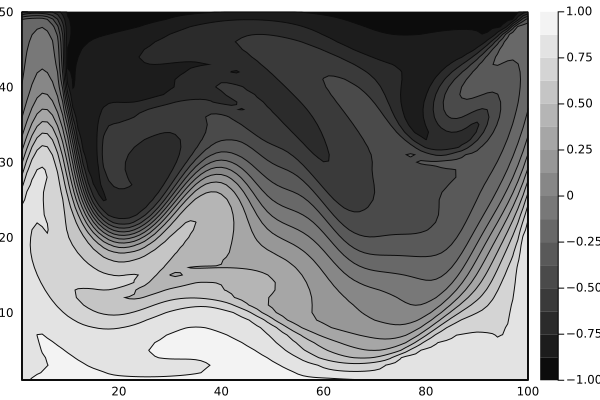

In [7]:
ncfile = NetCDF.open(joinpath(pk,"run0000","sst.nc"))
sst = ncfile.vars["sst"][:,:,:]
img=contourf(sst[:,:,end]',c = :grays, clims=(-1.,1.), frmt=:png)

Or to create an animated `gif`

```
anim = @animate for t ∈ 1:P.nd+1
   contourf(sst[:,:,t+1]',c = :grays, clims=(-1.,1.))
end
gif(anim, "sst.gif", fps = 40)
```

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*